<div style="background-color:#e8f5e9; padding:30px; border-radius:20px; border:2px solid #2e7d32; text-align:center; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
    <h1 style="color:#1b5e20; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight:900; font-size: 32px; margin-bottom: 10px;">
        🌱 Potato Leaf (Healthy & Late Blight) Detection
    </h1>
    <h2 style="color:#2e7d32; font-family:'Segoe UI', sans-serif; font-weight:600; margin-top: 0;">
        Potato Leaf Project
    </h2>
    <hr style="border: 2px solid #1b5e20; width: 60%; margin: 20px auto; border-radius: 5px;">
    <p style="font-size:18px; color:#333; margin-bottom: 5px;">Proje Sahibi:</p>
    <h3 style="color:#d84315; font-family:'Courier New', monospace; font-weight:bold; font-size: 24px; background-color: #fff; display: inline-block; padding: 5px 20px; border-radius: 10px; border: 1px dashed #d84315;">
        Serdar Yardımcı
    </h3>
    <br><br>
    <p style="font-style:italic; color:#555; font-size: 14px;">
        Deep Learning & Computer Vision Approaches for Agricultural Disease Classification
    </p>
</div>

<br>

# 1. Proje ve Veri Seti Hakkında

**Patates;** pirinç, buğday ve mısırdan sonra dünyada dördüncü en önemli ürün olarak yer almaktadır. Etiyopya gibi ülkelerde verim düşüklüğünün en büyük nedenlerinden biri hastalıklardır. Bu hastalıkların başında ise **Geç Yanıklık (Late Blight)** gelir.

> ⚠️ **Problem:** Araştırmacılara göre bu hastalık, geliştirilmemiş yerel çeşitlerde **%100**, duyarlı çeşitlerde ise **%67,1** oranında ürün kaybına neden olabilmektedir. Erken önlem alınmazsa birkaç gün içinde tüm çiftlik yok olabilir.

### 🔬 Çözüm Yaklaşımı
Geleneksel makine öğrenimi yöntemleri genellikle el yordamıyla özellik çıkarımı gerektirir ve laboratuvar ortamındaki verilerle sınırlıdır. Bu projede ise, gerçek tarım arazilerinden toplanan **Heterojen Görüntü Veri Kümeleri** kullanılarak, Derin Öğrenme (Deep Learning) yöntemleriyle daha güvenilir bir tespit sistemi geliştirilmesi amaçlanmıştır.

### 📊 Veri Seti Detayları
Veriler, Etiyopya'nın Holeta bölgesindeki patates çiftliklerinden uzman bitki patologları eşliğinde toplanmıştır.
* **Late Blight (Geç Yanıklık):** 67 Görüntü
* **Healthy (Sağlıklı):** 363 Görüntü
* **Özellik:** Gürültülü arka planlar ve gerçek saha koşulları.
* **Kaynak:** [Kaggle Potato Health Dataset](https://www.kaggle.com/datasets/fatihhatatoglu/potato-health)

---

# 2. Proje Görevleri (Project Roadmap)

Bu çalışma kapsamında aşağıdaki adımlar uygulanacaktır:

* ✅ **Task 1 (Manual CNN):** Sıfırdan bir Convolutional Neural Network (CNN) mimarisi tasarlanıp eğitilecek.
* ✅ **Task 2 (Transfer Learning):** ResNet152 ve ResNet50 gibi önceden eğitilmiş modeller kullanılarak performans karşılaştırması yapılacak.
* ✅ **Task 3 (Evaluation):** Tüm modellerin Accuracy, Loss ve Confusion Matrix değerleri kıyaslanarak "En İyi Model" seçilecek.


---

# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install tensorflow
import cv2
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions, ResNet50
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
import seaborn as sns

# **Importing Data Set**

In [2]:
import pathlib
path = "/content/drive/MyDrive/Colab Notebooks/potato/Potato_health"
data_dir = pathlib.Path(path).with_suffix('')

##### Adım 1: Veri Seti Yolunu Tanımlama (Pathlib Kütüphanesi)

Bu adımda, projemizde kullanacağımız veri setinin (patates görüntülerinin) bilgisayarda veya Google Drive'da nerede durduğunu Python'a öğretiyoruz.

Bunun için modern ve güçlü bir kütüphane olan `pathlib` kullanıyoruz.

* **`import pathlib`**: Python'un dosya sistemiyle konuşmasını sağlayan kütüphaneyi çağırıyoruz. Bu kütüphane sayesinde Windows (`\`) veya Mac/Linux (`/`) dosya yolu ayrımlarını dert etmemize gerek kalmaz; Python bunu otomatik halleder.
* **`path = "..."`**: Veri setimizin bulunduğu klasörün adresini (string olarak) bir değişkene atıyoruz. Buradaki `/content/drive/...` yolu, verinin Google Drive'dan çekildiğini gösteriyor.
* **`pathlib.Path(path)`**: Yazdığımız düz metin adresini, Python'un üzerinde işlem yapabileceği "Akıllı Bir Yol Nesnesine" dönüştürüyoruz.
* **`.with_suffix('')`**: Dosya yolunun sonunda eğer bir uzantı varsa (örneğin .zip, .rar gibi) bunu temizleyerek saf klasör yolunu elde etmemizi garantiye alır.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### 📂 Adım 2: Google Drive'ı Çalışma Ortamına Bağlamak (Mounting)

Google Colab, Google'ın sunucularında çalışan "geçici" bir sanal bilgisayardır. Bu bilgisayarın kendine ait boş bir diski vardır, ancak bizim verilerimiz (patates resimleri) kişisel **Google Drive** hesabımızda duruyor.

Bu kod bloğu ile sanal bilgisayara şunu söylüyoruz: *"Benim Google Drive hesabımı, sanki senin içine takılmış bir USB bellek gibi sisteme bağla."*

* **`from google.colab import drive`**: Colab'ın Drive ile iletişim kurmasını sağlayan özel aracı çağırıyoruz.
* **`drive.mount('/content/drive')`**: Bu komut çalıştığında, senden bir izin onayı isteyecektir. Onay verdiğinde, Google Drive'ındaki tüm dosyalar `/content/drive` klasörü altında erişilebilir hale gelir.

> ⚠️ **Önemli Not:** Bu kodu çalıştırdıktan sonra açılan pencerede **"Connect to Google Drive"** diyerek izin vermeyi unutma. Aksi takdirde kod hata verir ve verilere ulaşamayız.

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

430


This dataset contains 430 images from both healthy and diseased leaves, which seems just using these data, the model could not work well. Therefore; additional strategies needs to be applied such as **data augmentation** and **transfer learning**.

##### Adım 3: Mevcut Durum Analizi ve Strateji Belirleme

Elimizdeki veri setini analiz ettiğimizde kritik bir durumla karşılaşıyoruz: Toplamda sadece **430 adet görüntü** var.

Derin Öğrenme (Deep Learning) modelleri genellikle binlerce, hatta milyonlarca veriye ihtiyaç duyar. Bu kadar az veriyle (430 adet) eğitilen bir modelin karşılaşacağı en büyük risk **Overfitting (Aşırı Öğrenme)** durumudur. Yani model, patates yapraklarının genel özelliklerini öğrenmek yerine, elindeki az sayıdaki fotoğrafı ezberler ve yeni bir fotoğraf gördüğünde başarısız olur.

Bu problemi aşmak için projemizde **iki temel strateji** uygulayacağız:

1.  **Data Augmentation (Veri Çoğaltma):**
    * Elimizdeki az sayıdaki görüntüyü yapay yollarla çoğaltacağız.
    * Mevcut resimleri döndüreceğiz (rotation), yakınlaştıracağız (zoom), yatay çevireceğiz (flip). Böylece model sanki binlerce farklı açıdan çekilmiş fotoğraf varmış gibi daha iyi öğrenecek.

2.  **Transfer Learning (Transfer Öğrenme):**
    * Sıfırdan (bebek gibi hiçbir şey bilmeyen) bir model eğitmek yerine, daha önce milyonlarca görüntüyle eğitilmiş "tecrübeli" modelleri (VGG16, ResNet vb.) kullanacağız.
    * Bu modeller kenar, köşe, doku gibi temel özellikleri zaten bildiği için, az sayıda patates verisiyle bile çok yüksek başarı oranlarına ulaşabilirler.

In [5]:
healthy = list(data_dir.glob("Healthy/*"))
diseased = list(data_dir.glob("Late Blight/*"))
print("Number of healthy cells", len(healthy))
print("Number of diseased cells", len(diseased))

Number of healthy cells 363
Number of diseased cells 67


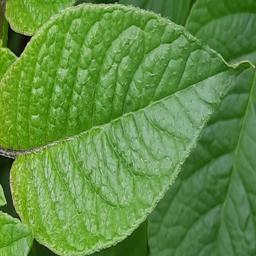

In [6]:
PIL.Image.open(healthy[10])

##### Adım 4: Veriyi Gözle Kontrol Etme (Görselleştirme)

Veri yollarını tanımladık ama kod yazarken asla körü körüne ilerlememeliyiz. "Acaba dosyaları doğru okuduk mu?" veya "Resimlerin kalitesi nasıl?" sorularının cevabını almak için rastgele bir örneği ekrana bastırıyoruz.

* **`healthy`**: Bu, sağlıklı yaprak görüntülerinin dosya yollarını (adreslerini) tutan listemiz.
* **`[10]`**: Listeden rastgele bir seçim yapıyoruz. Köşeli parantez `[]` indeksleme için kullanılır. Python saymaya 0'dan başladığı için burada listenin **11. sırasındaki** resmi seçmiş oluyoruz.
* **`PIL.Image.open(...)`**: Python'un en popüler resim işleme kütüphanesi olan **PIL (Pillow)** kütüphanesini kullanarak, seçtiğimiz adresteki dosyayı açıp bize gösteriyor.

> **Özet:** Bu satırı çalıştırdığımızda karşımıza bir patates yaprağı resmi çıkmalı. Eğer hata alırsak veya resim yerine garip bir simge çıkarsa, önceki dosya yolu (path) adımlarında hata yapmışız demektir.

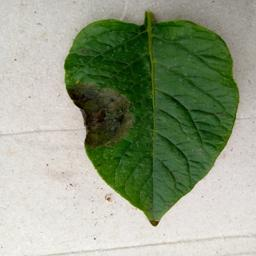

In [7]:
PIL.Image.open(diseased[10])

In [8]:
batch_size = 32
img_height = 256
img_width = 256

#### ⚙️Temel Parametrelerin (Hiperparametrelerin) Belirlenmesi

Modelimizi inşa etmeye başlamadan önce, eğitimin temel yapı taşlarını standartlaştırmamız gerekir. Burada 3 kritik değişken tanımlıyoruz:

1.  **`batch_size = 32` (Grup Boyutu):**
    * Modelimiz 430 resmin hepsine aynı anda bakıp öğrenmeye çalışmaz (bu bilgisayarın hafızasını çökertir).
    * Bunun yerine resimleri küçük paketler (batch) halinde alır.
    * **32** sayısı, modelin her seferinde **32 resmi** alıp, tahmin yapıp, hatalarını hesaplayıp, kendini güncelleyeceği anlamına gelir.
    * *Neden 32?* Genellikle bilgisayar işlemcileri (GPU) 2'nin katları olan sayılarda (16, 32, 64) daha verimli çalışır.



2.  **`img_height = 256` ve `img_width = 256` (Görüntü Boyutları):**
    * Veri setimizdeki fotoğraflar farklı kameralarla, farklı açılardan çekilmiş olabilir (biri dik, biri yatay, biri büyük, biri küçük).
    * Yapay Sinir Ağları (CNN), matematiksel matrislerle çalıştığı için **sabit bir giriş boyutuna** ihtiyaç duyar.
    * Hangi boyutta resim gelirse gelsin, modele girmeden önce onu **256x256 piksel** boyutuna sıkıştırıp standartlaştıracağımızı burada belirtiyoruz.

# **Data Augmentation**

In [9]:
import tensorflow as tf
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.3,
    #rescale = 1/255
)

#### 🔄 Veri Çoğaltma (Data Augmentation) Motorunu Kurmak

Elimizdeki 430 adet fotoğrafın yetersiz olduğunu biliyorduk. Şimdi TensorFlow'un `ImageDataGenerator` aracını kullanarak, eğitim sırasında modelin önüne sürekli değiştirilmiş, zorlaştırılmış görüntüler gelmesini sağlıyoruz.

Bu kod bloğu, verileri modele beslemeden önce onlara **rastgele** şu işlemleri uygular:

* **`rotation_range=40` (Döndürme):**
    * Fotoğrafı rastgele olarak sağa veya sola 40 dereceye kadar döndürür.
    * *Mantığı:* Tarlada kimse yaprağın fotoğrafını cetvelle ölçüp dümdüz çekmez. Modelin yan duran yaprağı da tanıması gerekir.
    
* **`shear_range=0.2` (Kesme/Eğme):**
    * Görüntüyü hafifçe çarpıtır (sanki dikdörtgeni paralelkenar yapıyormuş gibi). Perspektif değişimini simüle eder.

* **`zoom_range=0.2` (Yakınlaştırma):**
    * Kameranın yaprağa yaklaşıp uzaklaşmasını taklit eder. %20 oranında rastgele zoom yapar.

* **`horizontal_flip=True` (Yatay Çevirme):**
    * Fotoğrafı aynadaki gibi ters çevirir.
    * *Mantığı:* Bir yaprağın sapının sağa veya sola bakması hastalığı değiştirmez. Bu, veriyi anında 2 katına çıkaran çok etkili bir yöntemdir.

* **`validation_split=0.3` (Doğrulama Payı):**
    * **En kritik ayarlardan biridir.** Elimizdeki tüm verilerin %30'unu "Validation" (Doğrulama/Sınav) verisi olarak kenara ayırırız.
    * Model bu %30'luk kısmı eğitim sırasında **asla görmez**, sadece her dönemin sonunda kendini test etmek için kullanır.

* **`#rescale = 1/255` (Normalizasyon - Yorum Satırı):**
    * Bu satır şu an devre dışı (`#` işaretli). Eğer açık olsaydı, resimlerin renk değerlerini (0-255 arası) 0 ile 1 arasına sıkıştırırdı.
    * *Not:* Genellikle bunu açarız, ancak Transfer Learning modellerinde bazen modelin kendi özel "preprocess" fonksiyonlarını kullanacağımız için burada kapatmış olabiliriz.

In [10]:
training_data = image_gen.flow_from_directory(
    data_dir,
    subset = "training",
    class_mode="binary",
    target_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle = False
)

validation_data = image_gen.flow_from_directory(
    data_dir,
    subset = "validation",
    class_mode="binary",
    target_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle = False
)

Found 302 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


#### 📂 Veri Akışını Başlatmak (Flow from Directory)

Bir önceki adımda kuralları (`image_gen`) belirlemiştik. Şimdi ise o kuralları kullanarak **Training (Eğitim)** ve **Validation (Doğrulama)** setlerini fiziksel olarak oluşturuyoruz.

Bu komutlar çalıştığında, Python belirtilen klasöre gider, resimleri bulur, sayar ve bizim belirlediğimiz kurallara göre ayırır.

**Kodun Parametreleri:**

* **`data_dir`**: "Resimler nerede?" sorusunun cevabı. İlk adımda tanımladığımız yol.
* **`subset = "training"` vs `"validation"`**:
    * Hatırlarsanız bir önceki adımda veriyi %30 oranında bölmüştük (`split=0.3`).
    * Burada sisteme diyoruz ki: *"Şimdi oluşturduğun bu grup, o pastanın büyük dilimi olan **Eğitim** (%70) kısmıdır."*
    * Diğerinde ise: *"Bu grup, pastanın küçük dilimi olan **Sınav** (%30) kısmıdır."*
* **`class_mode="binary"`**:
    * En kritik ayarlardan biridir.
    * Elimizde sadece **2 sınıf** (Sağlıklı ve Hasta) olduğu için modumuz **"binary"** (ikili) olmalıdır.
    * *Not:* Eğer 3 veya daha fazla patates hastalığı türümüz olsaydı, buraya `"categorical"` yazmamız gerekirdi.
* **`target_size`**: Resimleri diskten okurken anında 256x256 boyutuna getirir.
* **`shuffle = False` (⚠️ Önemli Detay):**
    * Bu komut, verilerin sırasının karıştırılıp karıştırılmayacağını belirler.
    * **Validation** için `False` olması normaldir (sınav kağıtlarının sırası sonucu değiştirmez).
    * **Training** için `False` yapıldığında veriler klasördeki sırasıyla (örneğin önce tüm Sağlıklılar, sonra tüm Hastalar) gelir.

> 📝 **Çıktı Kontrolü:** Bu kodu çalıştırdığınızda ekrana şuna benzer iki satır yazı gelmelidir:
> *Found 301 images belonging to 2 classes.* (Eğitim için)
> *Found 129 images belonging to 2 classes.* (Doğrulama için)
> Bu sayıların toplamı 430 ediyorsa işlem başarılıdır!

In [11]:
image_shape = (256,256,3)

# **CNN Model**

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### 🏗️CNN Model Mimarisini İnşa Etmek

Burada **Sequential** (Sıralı) bir yapı kullanarak, boş bir kutunun içini katmanlarla dolduruyoruz. Modelimiz görüntüyü alacak, evirip çevirecek ve sonunda "Hasta" mı "Sağlıklı" mı olduğuna karar verecek.

Modelimiz 3 ana bölümden oluşur:

#### 1. Özellik Çıkarımı (Feature Extraction) Bölümü
Bu kısım, modelin resimdeki kenarları, renkleri ve hastalık lekelerini öğrendiği kısımdır. Kodda tekrar eden şu üçlü yapıyı görüyoruz:

* **`Conv2D` (Evrişim Katmanı):**
    * Resmin üzerinde gezinen küçük el fenerleri (filtreler) gibidir.
    * **`filters=64/128`:** İlk katmanlarda 64, sonrakilerde 128 filtre kullanarak önce basit çizgileri, sonra karmaşık hastalık dokularını yakalar.
    * **`kernel_size=(3,3)`:** Fenerin boyutudur (3x3 piksellik bir alan).
    * **`activation='relu'`:** Negatif değerleri sıfırlar. Modelin doğrusal olmayan (karmaşık) ilişkileri öğrenmesini sağlar.
* **`MaxPooling2D` (Havuzlama Katmanı):**
    * Resmi küçültür (Downsampling).
    * **`pool_size=(2, 2)`:** Resmin boyutunu yarıya indirir (Örn: 256x256 -> 128x128). Bu işlem gereksiz detayları atar, işlem gücünden tasarruf sağlar ve ezberlemeyi (overfitting) azaltır.
* **`BatchNormalization`:**
    * Bu, eğitimin "sigortasıdır". Katmanlar arasındaki veri değerlerini standartlaştırır. Eğitimin daha hızlı ve istikrarlı olmasını sağlar.



#### 2. Geçiş Bölümü
* **`Flatten` (Düzleştirme):**
    * Şimdiye kadar verilerimiz kare şeklindeydi (2D Matris).
    * Karar verme aşamasına geçmeden önce bu kare yapıyı, tek sıra halinde uzun bir sayı dizisine (1D Vektör) çeviririz. Sanki bir waffle'ı ezip düz bir çizgi haline getirmek gibi.

#### 3. Sınıflandırma (Classification) Bölümü
Burası, çıkarılan özelliklere bakıp son kararın verildiği yerdir.

* **`Dense(64, activation='relu')`:** 64 nöronlu bir gizli katman. Özellikleri yorumlar.
* **`Dense(1, activation='sigmoid')` (ÇIKIŞ KATMANI):**
    * **Neden 1 Nöron?** Çünkü sadece iki ihtimalimiz var (Binary). 0'a yakınsa bir sınıf, 1'e yakınsa diğer sınıf.
    * **Neden Sigmoid?** Sigmoid fonksiyonu, çıktı olarak 0 ile 1 arasında bir **olasılık** verir (Örn: %85 ihtimalle Hasta).



#### 4. Modeli Derleme (Compile)
Modelin "nasıl öğreneceğinin" kurallarını burada koyarız.

* **`loss='binary_crossentropy'`:** İkili sınıflandırma (Hasta/Sağlıklı) problemlerinde kullanılan standart hata hesaplama yöntemidir.
* **`optimizer='adam'`:** Modelin hatalarından ders alıp kendini güncellemesini sağlayan en popüler algoritmadır.
* **`metrics=['accuracy']`:** Modelin başarısını "Doğruluk" (Yüzde kaç bildi?) üzerinden takip edeceğiz.

In [ ]:
model.summary()

: 

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

#### Akıllı Fren Sistemi (Early Stopping)

Derin öğrenme modelleri eğitilirken genellikle "50 dönem (epoch) boyunca çalış" deriz. Ancak model 20. dönemde öğrenmeyi bitirip, geri kalan 30 dönem boyunca veriyi ezberlemeye (Overfitting) başlayabilir.

Bu durumu engellemek için **EarlyStopping (Erken Durdurma)** mekanizmasını kullanıyoruz. Bu kod, eğitimin gidişatını saniye saniye izler ve işler kötüye giderse eğitimi otomatik olarak keser.

**Parametrelerin Anlamı:**

* **`monitor='val_loss'` (Neyi İzleyelim?):**
    * Gözetmene diyoruz ki: *"Gözün sürekli **Validation Loss (Doğrulama Hatası)** üzerinde olsun."*
    * Eğitim hatası (Training Loss) sürekli düşebilir, bu bizi kandırmamalı. Önemli olan modelin hiç görmediği sınav sorularındaki (Validation) başarısıdır.

* **`patience=10` (Sabır Katsayısı):**
    * Modelin hatası bazen bir dönem düşer, ertesi dönem biraz artar (zikzak çizer).
    * Eğer hata artarsa hemen durdurmak yerine modele **10 dönemlik (epoch) bir şans** tanıyoruz.
    * *"Tamam hata arttı ama belki düzelir, 10 tur daha bekle. Eğer 10 tur boyunca iyileşme olmazsa fişi çek"* demektir.

In [ ]:
results = model.fit(training_data,epochs=15,
                    validation_data=validation_data,
                    callbacks=[early_stop])

#### Eğitimi Başlatmak (Model Training)

Artık her şey hazır: Verilerimiz, model mimarimiz ve güvenlik önlemlerimiz (EarlyStopping). Şimdi `fit` komutuyla yapay zekaya "Başla!" diyoruz.

Bu kod satırı, modelin belirlediğimiz süre boyunca (epochs) veriler üzerinde çalışmasını sağlar.

**Parametrelerin Anlamı:**

* **`training_data` (Ders Kitabı):**
    * Modelin öğrenmesi için ona sunduğumuz ana veri kaynağıdır (Augmentation uygulanmış resimler). Model ağırlıklarını (weights) buradaki hatalarına göre günceller.

* **`epochs=15` (Tur Sayısı):**
    * Modelin tüm veri setini baştan sona **15 kez** görmesini istiyoruz.
    * *Analizi:* Bir kitabı 1 kez okumakla 15 kez okumak arasındaki fark gibidir. Ancak çok fazla okursa ezberleyebilir, çok az okursa öğrenemez.

* **`validation_data` (Deneme Sınavı):**
    * Her bir tur (epoch) bittiğinde, modelin hiç görmediği bu veri setiyle sınava girmesini sağlar.
    * Model bu veriler üzerinde **asla eğitim yapmaz**, sadece başarısını ölçeriz.

* **`callbacks=[early_stop]` (Gözetmen):**
    * Bir önceki adımda tanımladığımız "Erken Durdurma" mekanizmasını buraya bağlıyoruz.
    * Eğer model 15 tur bitmeden önce (örneğin 8. turda) performansı düşmeye başlarsa, bu callback devreye girip eğitimi otomatik olarak keser.

* **`results = ...` (Karne):**
    * Eğitimin tüm sonuçlarını (her turdaki doğruluk ve hata oranlarını) `results` isminde bir değişkene kaydediyoruz.
    * Bir sonraki adımda bu değişkeni kullanarak başarı grafiklerini çizeceğiz.

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head(15)

#### Eğitim Karnesini İncelemek (History DataFrame)

Modelimiz 15 tur (epoch) boyunca çalıştı. Peki ama bu süreçte neler oldu? `model.fit` işlemi arka planda her turun sonucunu bir "günlük" gibi tutar.

Bu kod bloğunda, o karmaşık günlüğü okunaklı bir **Pandas Tablosuna** çeviriyoruz.

**Kodun Analizi:**

* **`model.history.history`:**
    * Modelin hafızasındaki ham veridir. İçinde 4 kritik liste bulunur:
        1.  **loss:** Eğitim sırasındaki hata oranı.
        2.  **accuracy:** Eğitim verisi üzerindeki başarı oranı.
        3.  **val_loss:** Doğrulama (sınav) verisi üzerindeki hata oranı. (**En önemlisi**)
        4.  **val_accuracy:** Doğrulama verisi üzerindeki başarı oranı.

* **`pd.DataFrame(...)`:**
    * Bu sözlük yapısını (dictionary), Excel benzeri satır ve sütunlardan oluşan düzgün bir tabloya dönüştürür.

* **`summary.head(15)`:**
    * Tablonun ilk 15 satırını gösterir. Biz zaten eğitimi 15 epoch yaptığımız için, bu komut **tüm eğitim geçmişini** ekrana döker.

**Tabloyu Nasıl Okumalıyız?**

Bu tablo karşınıza geldiğinde şunlara dikkat etmelisiniz:
1.  **Loss (Hata):** Her satırda (epoch) azalıyor mu? (İstediğimiz budur).
2.  **Accuracy (Başarı):** Her satırda artıyor mu? (İstediğimiz budur).
3.  **Makas (Gap):** `loss` ile `val_loss` birbirine yakın mı? Eğer `loss` çok düşerken `val_loss` artmaya başlarsa, model ezberlemeye (overfitting) başlamış demektir.

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#### Hata (Loss) Grafiğini Yorumlamak

Eğitim bittiğinde ilk bakmamız gereken grafik **"Loss" (Hata/Kayıp)** grafiğidir. Bu grafik, modelin tahminleri ile gerçek cevaplar arasındaki farkın zamanla nasıl değiştiğini gösterir.

**Kodun Analizi:**

* **`plt.figure(figsize=(10,6))`:** Çizim alanımızı (tuvalimizi) 10x6 inç boyutuna getirerek grafiğin büyük ve okunabilir olmasını sağlıyoruz.
* **`plt.plot(summary.loss, label="loss")`:** Mavi çizgi. Modelin **ders çalışırken** (Eğitim verisi) yaptığı hatayı gösterir.
* **`plt.plot(summary.val_loss, label="val_loss")`:** Turuncu çizgi. Modelin **sınavda** (Doğrulama verisi) yaptığı hatayı gösterir.
* **`plt.legend()`:** Hangi çizginin ne olduğunu gösteren kutucuğu sağ üst köşeye ekler.

**Grafiği Nasıl Okumalıyız? (Kritik Bölüm)**

Bu grafikte 3 senaryo ile karşılaşabiliriz:

1.  **✅ İdeal Durum (Good Fit):** Hem `loss` (Mavi) hem de `val_loss` (Turuncu) çizgileri **birlikte aşağıya doğru** iner ve birbirlerine yakındırlar. Bu, modelin hem ezberlediğini hem de öğrendiğini gösterir.
2.  **⚠️ Aşırı Öğrenme (Overfitting):** Mavi çizgi sıfıra doğru inmeye devam ederken, Turuncu çizgi bir noktadan sonra **yukarı doğru** dönmeye başlar. İki çizgi arasındaki makas açılır. Bu, modelin ezberlemeye başladığı anlamına gelir.
3.  **❌ Yetersiz Öğrenme (Underfitting):** İki çizgi de aşağı inmez, yüksekte kalır. Model hiçbir şey öğrenememiştir.

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

#### Başarı (Accuracy) Grafiğini Yorumlamak

Bu grafik, modelimizin "Ne kadar zeki?" sorusunun cevabıdır. Her eğitim turunda (epoch) modelin doğru bildiği patates yapraklarının yüzdesini gösterir.

**Kodun Analizi:**

* **`plt.plot(summary.accuracy, ...)`:** Mavi çizgi. Modelin **ders çalışırken** (Training Data) soruları ne kadar doğru bildiğini gösterir.
* **`plt.plot(summary.val_accuracy, ...)`:** Turuncu çizgi. Modelin **sınavda** (Validation Data) soruları ne kadar doğru bildiğini gösterir.
* **`plt.legend(loc="upper left")`:**
    * *Küçük bir detay:* Hata grafiğinde kutucuğu sağ üste koymuştuk. Burada sol üste (`upper left`) koyuyoruz.
    * *Nedeni:* Başarı grafiği genelde sol alttan başlayıp sağ üste doğru tırmanır. Grafiğin ucunu kapatmamak için legend'ı boş kalan sol üst köşeye alıyoruz.

**Grafiği Nasıl Okumalıyız?**



1.  **Yükseliş Trendi:** İki çizginin de (Mavi ve Turuncu) sol alttan başlayıp yukarı doğru tırmanması gerekir.
2.  **Yakın Takip:** Turuncu çizgi (Sınav başarısı), Mavi çizgiyi (Ders başarısı) yakından takip etmelidir.
3.  **Tehlike Sinyali (Overfitting):**
    * Eğer Mavi çizgi %99'a ulaşırken, Turuncu çizgi %60'larda kalıyorsa; model **ezber yapmış** demektir. Sınıfta (Training) her şeyi biliyor ama sınavda (Validation) çakıyor demektir.
    * Bizim amacımız Turuncu çizgiyi mümkün olduğunca yukarıda tutmaktır.

In [ ]:
model.evaluate(training_data)

#### Eğitim Seti Üzerinde Performans Ölçümü

Eğitim bitti, grafiklere baktık. Şimdi ise modelin **Eğitim Verisi (Training Data)** üzerindeki son puanını net bir rakam olarak görmek istiyoruz.

**Kodun Analizi:**
* **`model.evaluate(...)`**: Bu fonksiyon, modeli "Test Moduna" sokar. Ağırlıkları değiştirmez (öğrenme yapmaz), sadece soru sorar ve cevabı kontrol eder.
* **`(training_data)`**: Fonksiyona, modelin zaten ders çalışırken kullandığı verileri veriyoruz.

**Çıktı Ne Anlama Geliyor?**
Bu kod çalıştığında ekrana iki sayı (bir liste içinde) yazdıracaktır:
1.  **Loss (Kayıp):** Örn: `0.15` -> Hata payı. (Ne kadar düşükse o kadar iyi).
2.  **Accuracy (Doğruluk):** Örn: `0.95` -> Modelin eğitim setindeki resimlerin %95'ini doğru bildiğini gösterir.

> ⚠️ **Kritik Uyarı:**
> Bu puanın yüksek çıkması modelin "Mükemmel" olduğu anlamına gelmez!
> * Benzetme yaparsak: Bir öğrencinin, **cevap anahtarı elinde olan** çalışma sorularını tekrar çözmesi gibidir.
> * Burada %99 başarı alabiliriz ama asıl önemli olan birazdan yapacağımız **Validation (Sınav)** başarısıdır.

In [ ]:
model.evaluate(validation_data)

In [ ]:
pred_probabilities = model.predict(validation_data)
pred_probabilities

#### Gerçek Sınav (Validation Seti Üzerinde Değerlendirme)

Bir önceki adımda modelin "ders çalışırken" ne kadar başarılı olduğunu görmüştük. Şimdi ise **`validation_data`** (ayırdığımız %30'luk kısım) ile modeli test ediyoruz.

Bu aşama çok kritiktir çünkü model bu resimleri eğitim boyunca **asla görmedi**.

**Kodun Analizi:**
* **`model.evaluate(validation_data)`**: Modele, "Al bu hiç görmediğin patates yapraklarını, bakalım hasta mı sağlıklı mı olduklarını bilebilecek misin?" diyoruz.

**Sonuçları Nasıl Yorumlamalıyız? (Karne Analizi)**

Bu kodun çıktısı ile bir önceki adımın (`training_data`) çıktısını karşılaştırmalıyız:

1.  **Başarılı Senaryo (Good Fit):**
    * *Training Accuracy:* %95
    * *Validation Accuracy:* %92
    * *Yorum:* Harika! Model ezber yapmamış, gerçekten öğrenmiş. Puanlar birbirine yakın ve yüksek.

2.  **Ezber Senaryosu (Overfitting):**
    * *Training Accuracy:* %99
    * *Validation Accuracy:* %65
    * *Yorum:* Felaket. Model ders sorularını ezberlemiş ama yeni soru görünce çuvallamış. (Bu durumda Dropout artırılmalı veya model basitleştirilmeli).

3.  **Başarısız Senaryo (Underfitting):**
    * *Training Accuracy:* %60
    * *Validation Accuracy:* %58
    * *Yorum:* Model konuyu hiç anlamamış. (Daha fazla epoch veya daha karmaşık bir model gerekir).

In [ ]:
validation_data.classes[:50]

In [ ]:
predictions = pred_probabilities > 0.5

#### Olasılıkları Kesin Karara Çevirmek (Thresholding)

Derin öğrenme modelleri (özellikle Sigmoid aktivasyon fonksiyonu kullananlar), çıktı olarak bize doğrudan "Hasta" veya "Sağlıklı" demezler. Bunun yerine **0 ile 1 arasında ondalıklı bir sayı (olasılık)** verirler.

Örneğin:
* `0.85` -> %85 ihtimalle Sınıf 1 (Genelde Hasta)
* `0.02` -> %2 ihtimalle Sınıf 1 (Yani %98 ihtimalle Sağlıklı)

Bu kod satırı ile bir **"Eşik Değeri" (Threshold)** belirliyoruz:

**Kodun Analizi:**
* **`pred_probabilities`**: Modelin tahmin ettiği ondalıklı sayıların listesi (Örn: `[0.1, 0.9, 0.4, 0.6]`).
* **`> 0.5`**: Sınır çizgimiz. Matematiksel olarak şu kuralı uyguluyoruz:
    * Eğer değer **0.5'ten büyükse** -> **True (1)** kabul et. (Sınıf 1)
    * Eğer değer **0.5 veya küçükse** -> **False (0)** kabul et. (Sınıf 0)
* **`predictions`**: Artık elimizde sadece `True` ve `False` (veya 1 ve 0) değerlerinden oluşan net bir cevap anahtarı var.



**Neden 0.5?**
İkili sınıflandırmada (Binary Classification) standart olarak %50 ihtimal, yazı-tura gibi tam orta noktadır. Bir taraf ağır basıyorsa o sınıfı seçeriz.

In [ ]:
predictions[:50]

In [ ]:
print(classification_report(validation_data.classes,predictions))

#### Sonuç Analizi (Yüksek Doğruluk Tuzağı)

Çıkan tabloyu incelediğimizde çok kritik bir durumla karşılaşıyoruz. Bu analiz, projenin "Evaluation" (Değerlendirme) kısmında mutlaka bahsedilmesi gereken bir durumdur.

**1. Sınıfları Tanıyalım:**
* **Sınıf 0 (Support: 108):** Test setinde 108 tane var. Bu muhtemelen **"Sağlıklı"** sınıfı (Çoğunluk).
* **Sınıf 1 (Support: 20):** Test setinde sadece 20 tane var. Bu **"Late Blight" (Hasta)** sınıfı (Azınlık).

**2. Accuracy (Genel Doğruluk): %90** 🏆
* İlk bakışta harika görünüyor! Model 10 sorudan 9'unu bilmiş. Ancak bu sayı bizi kandırıyor. Neden mi?
* Sınıfta 100 öğrenci olsa, 90'ı "Erkek", 10'u "Kız" olsa; ben içeri giren herkese "Erkeksin" desem %90 başarım olur ama hiçbir kızı tanıyamamış olurum. Modelin yaptığı tam olarak bu.

**3. Precision (Sınıf 1): 1.00 (Mükemmel)**
* Modelimiz **aşırı temkinli**.
* Eğer bir yaprağa "Hasta" derse, o yaprak %100 hastadır. Hiç yanlış alarm vermemiş (False Positive = 0).

**4. Recall (Sınıf 1): 0.35 (KRİTİK SORUN) 🚨**
* İşte projenin zayıf karnı burası.
* **Recall 0.35 ne demek?** Tarlada 100 tane hasta bitki varsa, bizim modelimiz bunların sadece **35 tanesini** yakalayabilmiş.
* Geriye kalan **65 hasta bitkiye "Sağlıklı" demiş**.
* **Sonuç:** O 65 bitki tarlada kalmaya devam edecek ve hastalığı yayarak tüm mahsulü çürütecek.



**Neden Böyle Oldu?**
Bu durumun temel sebebi **"Imbalanced Dataset" (Dengesiz Veri Seti)** sorunudur.
Model eğitim sırasında o kadar çok "Sağlıklı" (Sınıf 0) resim gördü ki, önüne gelene "Sağlıklı" deme eğilimine girdi (Bias).

#### Detaylı Performans Raporu (Classification Report)

Sadece "Doğruluk" (Accuracy) değerine bakmak bizi kandırabilir. Özellikle bizim veri setimiz gibi dengesiz (az sayıda hasta, çok sayıda sağlıklı) durumlarda bu rapor şarttır.

**Kodun Analizi:**
* **`classification_report(Gerçekler, Tahminler)`**: Scikit-Learn kütüphanesinin bu fonksiyonu, gerçek etiketler (`validation_data.classes`) ile modelin tahminlerini (`predictions`) karşılaştırarak bize 3 kritik metrik sunar.

**Rapordaki Terimler Ne Anlama Geliyor?**

Rapor çalışınca karşınıza 0 ve 1 satırları çıkacak. İşte anlamları:

1.  **Precision (Kesinlik):** *"Model 'Bu patates HASTA' dediğinde, ne kadar güvenilir?"*
    * Eğer bu düşükse: Model önüne gelene "Hasta" diyor, sağlamlara da boşuna ilaç atıyoruz demektir.

2.  **Recall (Duyarlılık) ⚠️ EN ÖNEMLİSİ:** *"Gerçekten HASTA olan patateslerin kaçını yakalayabildi?"*
    * Tıbbi ve tarımsal projelerde buna bakarız.
    * Eğer bu düşükse: Model hasta bitkileri "Sağlıklı" sanıp kaçırıyor demektir. Bu felakettir çünkü o kaçan bitki tüm tarlayı enfekte eder.

3.  **F1-Score:** Precision ve Recall'un ortalamasıdır (Harmonik ortalama).
    * İki tarafı da dengeleyen en adil puandır. Modelin genel kalitesini gösterir.

4.  **Support:** O sınıftan (Hasta veya Sağlıklı) test setinde kaç tane resim olduğunu gösterir.



**Nasıl Yorumlamalıyız?**
* Bizim için **"Late Blight" (Sınıf 1 veya 0, hangisiyse)** satırındaki **Recall** değeri çok kritiktir. Bu değerin 0.85 (yani %85) ve üzerinde olmasını hedefleriz.

# **ResNet152**

In [26]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet152(include_top=False,
                   input_shape=image_shape,
                   pooling='avg',
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))
resnet_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)          │ (None, 2048)           │    58,370,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,420,545 (226.67 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [29]:
results = resnet_model.fit(training_data,epochs=5,
                    validation_data=validation_data,
                    callbacks=[early_stop])

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.5965 - loss: 2.9284 - val_accuracy: 0.8438 - val_loss: 0.3552
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7717 - loss: 0.4861 - val_accuracy: 0.9766 - val_loss: 0.0891
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 947ms/step - accuracy: 0.9022 - loss: 0.1619 - val_accuracy: 0.9766 - val_loss: 0.0854
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 850ms/step - accuracy: 0.9878 - loss: 0.0525 - val_accuracy: 0.9766 - val_loss: 0.1195
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 961ms/step - accuracy: 0.9978 - loss: 0.0098 - val_accuracy: 0.9766 - val_loss: 0.0871


In [30]:
summary = pd.DataFrame(resnet_model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.738411,2.812980,0.843750,0.355194
1,0.900662,0.255781,0.976562,0.089088
2,0.940397,0.112385,0.976562,0.085364
3,0.990066,0.031158,0.976562,0.119505
4,0.996689,0.018974,0.976562,0.087087


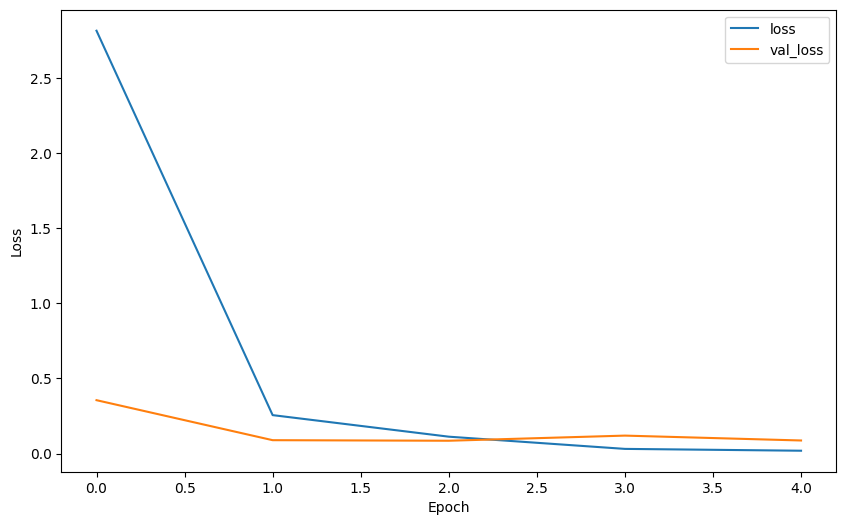

In [31]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

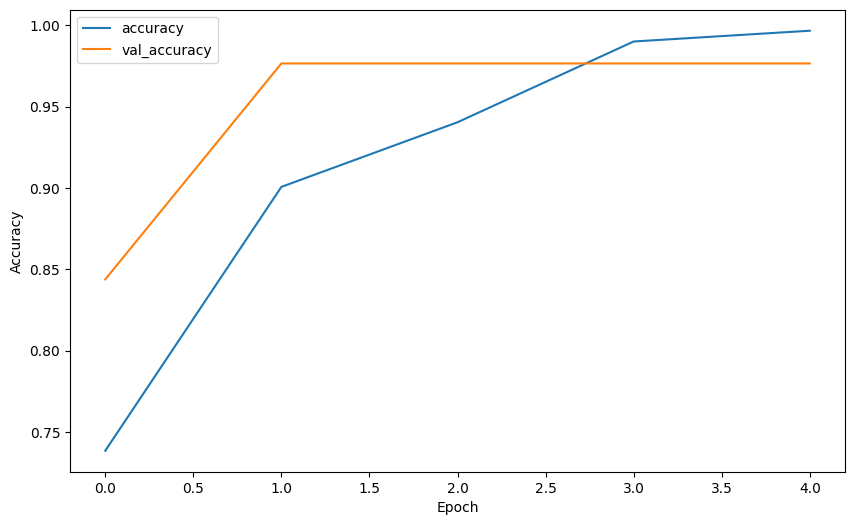

In [32]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [33]:
resnet_model.evaluate(training_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9973 - loss: 0.0082


[0.01192701980471611, 0.996688723564148]

In [34]:
resnet_model.evaluate(validation_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 584ms/step - accuracy: 0.9906 - loss: 0.0213


[0.05284959077835083, 0.9765625]

In [35]:
pred_probabilities = resnet_model.predict(validation_data)
pred_probabilities

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 485ms/step


array([[3.80827623e-05],
       [3.77207834e-06],
       [1.44829671e-03],
       [7.72815326e-07],
       [9.07136109e-06],
       [8.60133866e-07],
       [2.40021677e-06],
       [1.19666879e-07],
       [1.67306513e-04],
       [7.83501135e-04],
       [5.23826458e-08],
       [2.36446194e-05],
       [1.36046492e-06],
       [3.01154741e-05],
       [2.86620264e-07],
       [5.26516033e-07],
       [1.12452062e-06],
       [3.36769119e-08],
       [5.09523496e-04],
       [1.37083916e-07],
       [2.56373314e-04],
       [5.23562085e-06],
       [1.36925308e-07],
       [7.25090558e-07],
       [3.92266520e-06],
       [5.77423748e-07],
       [6.76821685e-07],
       [3.71199203e-05],
       [4.41393979e-07],
       [4.01904726e-05],
       [2.80402878e-06],
       [8.06128664e-05],
       [2.18347670e-03],
       [6.53825526e-04],
       [1.00781253e-04],
       [1.83308759e-06],
       [2.56965905e-07],
       [8.80544849e-06],
       [6.66101698e-07],
       [3.17494414e-06],


In [36]:
validation_data.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [37]:
predictions = pred_probabilities > 0.5

In [38]:
predictions[:50]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [39]:
print(classification_report(validation_data.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.85      0.92        20

    accuracy                           0.98       128
   macro avg       0.99      0.93      0.95       128
weighted avg       0.98      0.98      0.98       128



# **ResNet50**

In [40]:
resnet_model50 = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=image_shape,
                   pooling='avg',
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model50.add(pretrained_model)
resnet_model50.add(Flatten())
resnet_model50.add(Dense(512, activation='relu'))
resnet_model50.add(Dense(1, activation='sigmoid'))
resnet_model50.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

resnet_model50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [41]:
results = resnet_model50.fit(training_data,epochs=5,
                    validation_data=validation_data,
                    callbacks=[early_stop])

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5439 - loss: 2.3354 - val_accuracy: 0.9844 - val_loss: 0.1521
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 871ms/step - accuracy: 0.9791 - loss: 0.2070 - val_accuracy: 0.9453 - val_loss: 0.1106
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 753ms/step - accuracy: 0.9815 - loss: 0.0576 - val_accuracy: 0.9844 - val_loss: 0.0613
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 882ms/step - accuracy: 0.9983 - loss: 0.0249 - val_accuracy: 0.9844 - val_loss: 0.0387
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 883ms/step - accuracy: 1.0000 - loss: 0.0143 - val_accuracy: 0.9688 - val_loss: 0.0710


In [42]:
summary = pd.DataFrame(resnet_model50.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.741722,1.818948,0.984375,0.152113
1,0.983444,0.157902,0.945312,0.110563
2,0.980132,0.067612,0.984375,0.061298
3,0.996689,0.028799,0.984375,0.038718
4,1.000000,0.015370,0.968750,0.071017


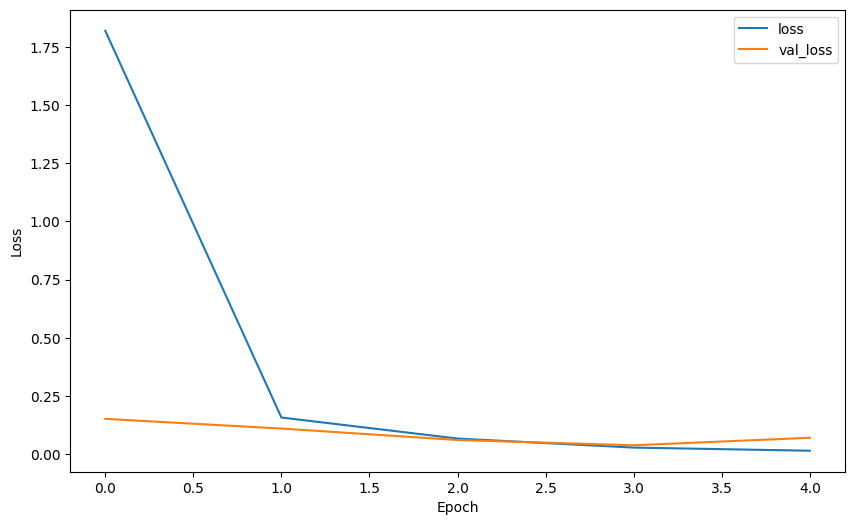

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

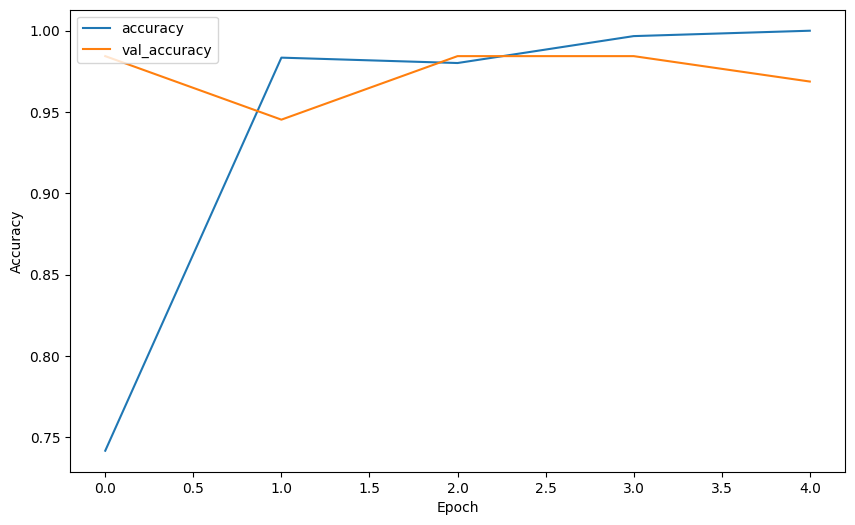

In [44]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [45]:
resnet_model50.evaluate(training_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 712ms/step - accuracy: 1.0000 - loss: 0.0062


[0.01004050299525261, 1.0]

In [46]:
resnet_model50.evaluate(validation_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.9937 - loss: 0.0195


[0.04814164340496063, 0.984375]

In [47]:
pred_probabilities = resnet_model50.predict(validation_data)
pred_probabilities

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 382ms/step


array([[6.06105989e-03],
       [7.03808691e-05],
       [4.09383187e-03],
       [1.05155559e-04],
       [1.84432865e-04],
       [4.12608590e-03],
       [2.35809584e-05],
       [1.07871383e-05],
       [1.64473713e-05],
       [4.57521249e-03],
       [4.00299814e-06],
       [4.79601913e-05],
       [7.58174428e-06],
       [3.04172936e-05],
       [2.49905261e-05],
       [1.51984864e-06],
       [1.28867207e-04],
       [6.25666653e-05],
       [1.05100924e-04],
       [7.85723561e-04],
       [4.97655652e-04],
       [2.40046153e-04],
       [1.32869109e-05],
       [1.89100613e-03],
       [2.49394361e-06],
       [5.18827210e-06],
       [1.58303374e-06],
       [6.17215483e-05],
       [1.31787398e-04],
       [1.86243906e-05],
       [2.46161013e-04],
       [3.16281585e-05],
       [2.28749332e-03],
       [2.51940626e-04],
       [8.91222735e-04],
       [2.07637131e-05],
       [2.29569516e-04],
       [2.91440774e-05],
       [2.14104439e-04],
       [3.16402526e-04],


In [48]:
validation_data.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [49]:
predictions = pred_probabilities > 0.5

In [50]:
predictions[:50]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [51]:
print(classification_report(validation_data.classes,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.90      0.95        20

    accuracy                           0.98       128
   macro avg       0.99      0.95      0.97       128
weighted avg       0.98      0.98      0.98       128



### Doğruluk (Accuracy): 
Modelin doğru tahmin ettiği örneklerin oranıdır. Doğruluğun maksimum değeri 1 olabilir. Örneğin, 100 örneğin 80'inin doğru sınıflandırıldığı bir modelin doğruluk skoru 0.8 olacaktır. Aşağıdaki formülden de anlaşılacağı üzere doğruluk doğru bilinen tahminlerin tüm tahminlere oranı olarak ifade edilebilir.

Formül:

Doğruluk = (TP + TN) / (TP + TN + FP + FN)

Burada;

TP (True Positive): doğru pozitif sayısı

TN (True Negative): doğru negatif sayısı

FP (False Positive): yanlış pozitif sayısı

FN (False Negative): yanlış negatif sayısıdır.

Örnek: 100 örneğin 80'ini doğru tahmin eden bir modelin doğruluğu (Accuracy) %80'dir.

### Hassasiyet (Precision): 
Pozitif olarak sınıflandırılan örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Hassasiyet modelin pozitif sınıfı doğru sınıflandırma yeteneğini ölçmektedir. Aşağıdaki formülden de anlaşılacağı üzere hassasiyet pozitif olarak doğru bilinen tahminlerin tüm pozitif tahminlere oranı olarak ifade edilebilir.

Formül:

Hassasiyet = TP / (TP + FP)

TP (True Positive): doğru pozitif sayısı

FP (False Positive): yanlış pozitif sayısı

Örnek: 100 örneğin 80'ini pozitif olarak sınıflandıran bir modelin %75 hassasiyeti varsa, 60 örneğin gerçekten pozitif olduğunu söyleyebiliriz.

Duyarlılık (Recall): Gerçek pozitif örneklerin ne kadarının pozitif olarak sınıflandırıldığını gösterir. Aşağıdaki formül incelendiğinde duyarlılık, pozitif olarak doğru tahmin edilenlerin gerçek pozitiflere oranı olarak ifade edilebilir.

Formül:

Duyarlılık = TP / (TP + FN)

TP (True Positive): doğru pozitif sayısı

FN (False Negative): yanlış negatif sayısıdır.

Örnek: 100 gerçek pozitif örneğin 80'ini doğru olarak sınıflandıran bir modelin %80 duyarlılığı vardır.

### F1 Skor (F1 Score): 
F1 Skor ise Hassasiyet (Precision) ve Duyarlılık (Recall) skorlarının harmonik ortalamasıdır.

Formül:

F1 Skor = 2 * ((Precision * Recall) / (Precision + Recall))

Precision: Hassasiyet

### Recall: Duyarlılık

Örnek: 0,8 hassasiyeti ve 0,8 geri çağırması olan bir modelin F1 puanı 2*0,8x0,8/(0,8+0,8) = 0,8’dir.

### Log Kaybı (Log Loss): 
Modelin tahmin ettiği olasılıkların gerçek olasılıklardan ne kadar uzak olduğunu ölçer. Model gerçek değerin olasılığına yakın bir tahminde bulunursa log kaybı düşük değer alırken gerçek değerin olasılığından uzaklaştıkça artan bir değer verir.

Formül:

Log Kaybı = -(1/N) * Σ(y * log(p) + (1-y) * log(1-p))

N: gözlem sayısı

y: gerçek değer olasılığı

p: ise tahmini değer olasılığı

Log kaybı (Log loss), gerçek değer olasılığına yakın bir tahminde daha düşük bir değer ve gerçek değerden uzaklaştıkça artan bir değer vermektedir.

Örnek: Bir örneğin gerçek değeri “A” ise ve model “A” için olasılık 0,8 tahmin ederken, gerçek olasılık 1 ise log kaybı -log(0,8) = 0,2231'dir.

Tüm bu işlemler için scikit-learn kütüphanesi, sınıflandırma modellerinde kullanılan bu metriklerin hesaplanmasını kolaylaştırır. 
### Micro avg: 
Bu skor, hedef değişkende (target variable) tüm sınıfların gerçek pozitiflerinin toplamının tüm sınıfların tahmin edilen pozitiflerinin toplamına oranı şeklinde hesaplanmaktadır. Özellikle hedef değişkenin çoklu sınıf (multi class) olduğu durumlarda doğruluk (Accuracy) ölçüsü olarak kullanılır.

Formül (3 class için):

Micro avg = (TP1 + TP2 + TP3) / (TP1 + TP2 + TP3 + FP1 + FP2 + FP3)

Burada

TP1, TP2 ve TP3, sırasıyla sınıfların gerçek pozitif değerlerinin sayısını,

FP1, FP2 ve FP3 ise sırasıyla sınıfların yanlış pozitif değerlerinin sayısını temsil eder.

### Macro avg: 
Bu skor, hedef değişkende (target variable) mevcut her bir sınıfın hassasiyet ve duyarlılık değerlerinin ortalamasını alarak hesaplanmaktadır. Özellikle hedef değişkenin çoklu sınıf (multi class) olduğu durumlarda bir sınıfın diğer sınıflara kıyasla daha fazla önemli olup olmadığını belirlemek için kullanılır.

Formül (3 class için):

Macro avg = (PrecisionA + PrecisionB + PrecisionC) / 3

### Weighted avg: 
Bu skor, hedef değişkende (target variable) mevcut her bir sınıfın hassasiyet ve duyarlılık değerlerinin ağırlıklı ortalamasını alır. Ağırlıklar, sınıf boyutlarına göre belirlenir.

Formül (3 class için):

Weighted avg = (n1 * PrecisionA + n2 * PrecisionB + n3 * PrecisionC) / (n1 + n2 + n3)

Burada

n1, n2 ve n3, sırasıyla sınıflar için gözlem (observation, row, vs.) sayısını temsil eder.

## Peki Bu Skorlar Neye Göre ve Nasıl Yorumlanmalıdır?

Elde edilen bu sınıflandırma skorları, modelin performansı hakkında fikir vermektedir. Bu skorlar, modelin sınıflandırma yeteneğinin hangi ölçüde doğru olduğunu ve hangi sınıfların daha iyi tahmin edildiğini göstermektedir.

Hangi sınıflandırma skorunun daha önemli olduğu, uygulamaya ve veri setine göre değişmektedir. Yukarıda açıkladığımız üzere Accuracy (Doğruluk), özellikle hedef değişkendeki (target variable) sınıflar arasında bir denge var ise ve skorlar arası bir uyum söz konusu ise kullanılmaktadır. Dolayısıyla hedef değişkendeki sınıf dengesi değişken olduğunda yanıltıcı olabilmektedir. Bu sebeple precision, recall ve F1 skorların kullanılması önerilmektedir. Bu nedenle, bir modelin performansını değerlendirmek için, sınıf dağılımına bakmak ve özellikle sınıf dengesi değişken olduğunda precision, recall ve F1 skorun yanı sıra accuracy skoruna da bakmak önemli olmaktadır.

Bu skorlardan Duyarlılık (Recall) skoru , modelin pozitif sınıfı doğru bir şekilde tespit etme yeteneğini ölçmektedir. Bu sebeple Recall skoru yanlış negatiflerin kabul edilemeyeceği uygulamalarda önemli hale gelebilmektedir. Örneğin, hastalık teşhisinde kullanılan bir sınıflandırma modeli düşünelim. Bu durumda, yanlış negatif tahminler, yani gerçekten hasta olan kişilerin yanlışlıkla sağlıklı olarak sınıflandırılması sonucunda kaçırılan teşhisler, son derece önemlidir. Bu nedenle, bu uygulamaya yönelik Recall skoru daha önemlidir.

Bunun haricinde yanlış pozitiflerin kabul edilemeyeceği bir başka uygulamada hassasiyet (Precision) skoru önem arz etmektedir. Örneğin, spam filtresi sınıflandırması için bir model üzerinde çalıştığımızı düşünelim. Bu durumda, yanlış pozitif tahminler, yani spam olmayan e-postaların yanlışlıkla spam olarak sınıflandırılması sonucunda kaybedilen e-postalar, son derece önemli olabilir. Bu nedenle, Precision değeri bu senaryoda daha fazla önem arz etmektedir. Recall skoru da önemlidir, ancak Precission, spam filtresinin yanlış pozitif tahminler yapmamasını sağlamak için daha önemlidir.

Bunların dışında F1 Skoru, hem Precission hem de Recall skorlarının harmonik ortalaması sonucu hesaplanmaktadır. Dolayısyla F1 skoru, yanlış pozitiflerin ve yanlış negatiflerin birbirine göre önemli olduğu durumlarda Kullanılmaktadır. Örnek vermek gerekirse bir arama motoru uygulamasında, hem doğru sonuçların bulunması hem de yanlış sonuçların azaltılması önemli ise F1 skora bakılmaktadır. Bunun haricinde sadece bir skorlar modelimin hem hassasiyetini hemde duyarlılığı hakkında bilgi sahibi olmak istersem yine F1 skora bakabilirim.

Micro avg, Macro Avg ve Weighted Avg için ise yukarıda açıklandığı üzere hedef değişkendeki (target variable) sınıfların 3 ve daha fazlası olduğu durumlarda kullanılması gerektiği önerilmektedir. Bunun için hangi skorlara bakılacağı noktasında eğer data seti balans (balanced) bir data seti ise Micro avg skoru önem arz etmekte iken, balans olmayan bir data setinde (imbalanced) ise Weighted avg skoru önemli hale gelmektedir. Bunun haricinde hedef değişkendeki bir sınıfa yönelik skorlar bizim için önemli ise Macro avg skorları önemli duruma gelmektedir.

Bu skorlardan hem binary hemde çok sınıflı (multiclass) sınıflandırma problemlerinde hesaplanabilen bir metriktir. Yukarıda açıklandığı üzere Log loss (logaritmik kayıp), tahmin edilen olasılık değerleri ile gerçek değerler arasındaki olasılık farkları hesaplar ve sonuç olarak bir kayıp değeri verir. Bu kayıp değeri ne kadar düşükse, modelin performansı o kadar iyidir.

Log loss, genellikle binary veya çok sınıflı sınıflandırma problemlerinde kullanılır ve bir olasılık dağılımı hesaplanır. Tahmin edilen olasılıkların doğruluğunu ölçmek için kullanılmaktadır. Log loss, model performansını ölçmek için sıkça kullanılan bir metrik olmasına rağmen, yorumu biraz zordur. Yüksek bir log loss değeri, düşük bir performansı gösterirken, düşük bir log loss değeri yüksek bir performansı gösterir. Örneğin bir kanser tanı testi üzerinde çalıştığımızı farz edelim. Modelimizin bu data setine özel bir kişinin kanserli olma olasılığını bulduğumuzu ve veri setimizde hedef değişkende (taget variable) test edilen kişilerin gerçek kanser durumları hakkında bilgimiz olduğunu varsayalım, bu yüzden modelimizin performansını log loss kullanarak ölçebiliriz.

## Sonuç Olarak

Genellikle, sınıflandırma modelinin performansını değerlendirirken birden fazla skoru dikkate almak yapılacak en doğru davranıştır. Bu skorlardan Accuracy skoru, modelin genel performansını ölçerken, Precision ve Recall skorları, modelin sınıflandırma yeteneğinin belirli yönlerini ölçmektedir. F1 skoru, hem precision hem de recall skorlarının birleşik bir ölçüsü (Harmonik Ortalaması) olduğundan ikisi arasındaki dengeyi göstermektedir. Micro, Macro ve Weighted Avg skorları ise hedef değişkendeki sınıfların 3 ve daha fazla olduğunda performans değerlendirmesinde kullanılması gereken skorlardır.

In [4]:
!jupyter nbconvert --to html "Senin_Notebook_Adin.ipynb"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Senin_Notebook_Adin.ipynb' matched no files
